##### Telecom Churn Case Study

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

##### Step1: Importing and Merging Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Importing all the data set

In [6]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


##### Combining all the data files in one consolidate dataframe

In [10]:
#Merging on customer id

df_1 = pd.merge(churn_data, customer_data, how = 'inner', on = 'customerID')

In [11]:
# Final dataframe with all predictor variable

telecom = pd.merge(df_1, internet_data, how = 'inner', on = 'customerID')

##### Step2: Inspecting the data frame

In [13]:
# Head of the combined dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [14]:
# Shape of the combined dataset
telecom.shape

(7043, 21)

In [15]:
# Statistical aspect of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [16]:
# Checking each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


##### Step3: Data Preparation

In [18]:
# Converting some binary variable to (Yes/No) to 0/1

In [19]:
# List of variables to map
varlist = ['PhoneService', 'PaperlessBilling','Churn', 'Partner', 'Dependents']

telecom[varlist] = telecom[varlist].apply(lambda x: x.map(lambda i : 1 if i == 'Yes' else 0))

In [20]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [21]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


##### For categorical variable with multiple levels , create dummy features(one hot encoded)

In [23]:
#checking unique values of categorical values

In [24]:
telecom['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [25]:
telecom['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
# creating dummy variable for some categorical variable and dropping the first one

dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first= True)

# Adding the data to main dataframe
telecom = pd.concat([telecom, dummy1], axis = 1)

In [27]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [28]:
telecom['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [29]:
telecom['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy varibale for MultipleLines

ml = pd.get_dummies(telecom['MultipleLines'], prefix= 'MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'], axis =1)

# Adding data to master data frame
telecom = pd.concat([telecom, ml1], axis=1)

# creating dummy variable for OnlineSecurity
os = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis =1)
# adding data to master data frame
telecom = pd.concat([telecom, os1], axis =1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis= 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis= 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],axis= 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],axis= 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],axis= 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [31]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


##### Dropping the repeated variables

In [33]:
# we have created dummy varibale so dropping the same

telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'InternetService', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'  ], axis =1)

In [34]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,True,False,True,False,True,False,True,False,True,False


In [35]:
telecom['StreamingTV_No']

0        True
1        True
2        True
3        True
4        True
        ...  
7038    False
7039    False
7040     True
7041     True
7042    False
Name: StreamingTV_No, Length: 7043, dtype: bool

In [36]:
#checking the dtypes of the data
telecom.dtypes

customerID                                object
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_No                            bool
MultipleLines_Yes                           bool
OnlineSecurity_No   

In [37]:
# converting the bool dtype to int64
telecom = telecom.apply(lambda x: x.astype('int64') if x.dtype == 'bool' else x)

In [38]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [39]:
#converting dtype object to numeric
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors= 'coerce')

In [40]:
telecom.dtypes

customerID                                object
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit card (automatic)      int64
PaymentMethod_Electronic check             int64
PaymentMethod_Mailed check                 int64
gender_Male                                int64
InternetService_Fiber optic                int64
InternetService_No                         int64
MultipleLines_No                           int64
MultipleLines_Yes                          int64
OnlineSecurity_No   

Now it can be noticed that all the rquired variable are numeric

##### Checking for outliers in continuous variable

In [43]:
# Checking outliers for continuous variable
num_telecom = telecom[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

In [44]:
#Checking outliers at 50%, 75%, 90%, 95%, 99%
num_telecom.describe(percentiles=[.5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


From the distribution shown above , there are no outliers in our data and numbers are gradually increasing

##### Cheking the missing values and input them

In [47]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [48]:
#Cheking the percentage of missing values
round(100 *(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [49]:
# removing the NaN values from TotalCharges

telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [50]:
#Checking the percentage of missing values after removing the missing values
round(100 *(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

It is confirmed that we donot have any more missing values

##### Step:4 Train test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Putting feature variable to X

X = telecom.drop(['customerID', 'Churn'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [55]:
# Putting response variable to y

y= telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [56]:
# Splitting the data into train test set

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= .7, test_size= .3, random_state =100)

##### Step5: Feature Scaling 

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

telecom[['tenure','MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(telecom[['tenure','MonthlyCharges', 'TotalCharges']])

telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0.064303,1,0,-0.260878,-0.173740,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,-1.239504,1,1,-0.363923,-0.959649,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0.512486,0,0,-0.747850,-0.195248,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,-1.239504,1,1,0.196178,-0.940457,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [60]:
# Cheking the churn rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

It can be seen that churn rate is almost 27%

##### Step:6  Checking the correlation

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

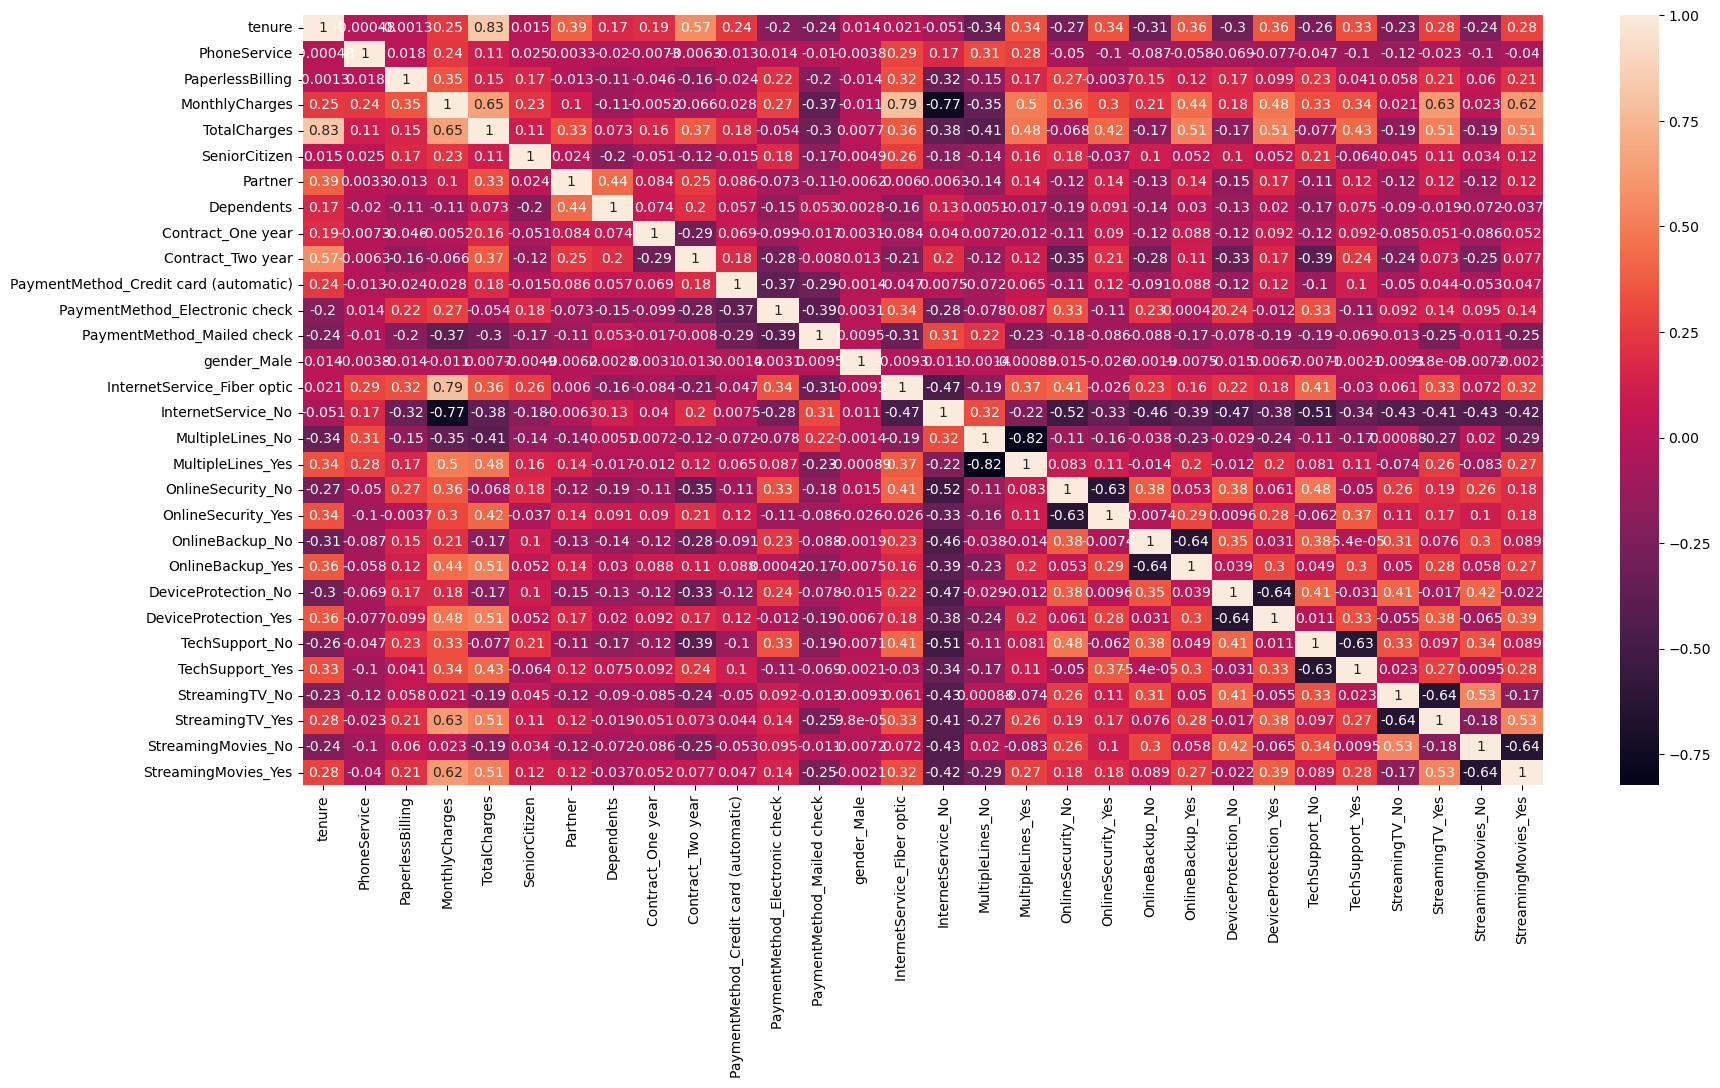

In [64]:
# Checking the correlation matrix

plt.figure(figsize= (20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()


##### Dropping the highly correlated dummy variable

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 879 to 5649
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4922 non-null   int64  
 1   PhoneService                           4922 non-null   int64  
 2   PaperlessBilling                       4922 non-null   int64  
 3   MonthlyCharges                         4922 non-null   float64
 4   TotalCharges                           4922 non-null   float64
 5   SeniorCitizen                          4922 non-null   int64  
 6   Partner                                4922 non-null   int64  
 7   Dependents                             4922 non-null   int64  
 8   Contract_One year                      4922 non-null   int64  
 9   Contract_Two year                      4922 non-null   int64  
 10  PaymentMethod_Credit card (automatic)  4922 non-null   int64  
 11  Payment

In [67]:
X_train = X_train.drop(['MultipleLines_No', 'OnlineSecurity_No','OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No','StreamingTV_No', 'StreamingMovies_No'], axis=1)

X_test = X_test.drop(['MultipleLines_No', 'OnlineSecurity_No','OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No','StreamingTV_No', 'StreamingMovies_No'], axis=1)

##### Checking the correlation again

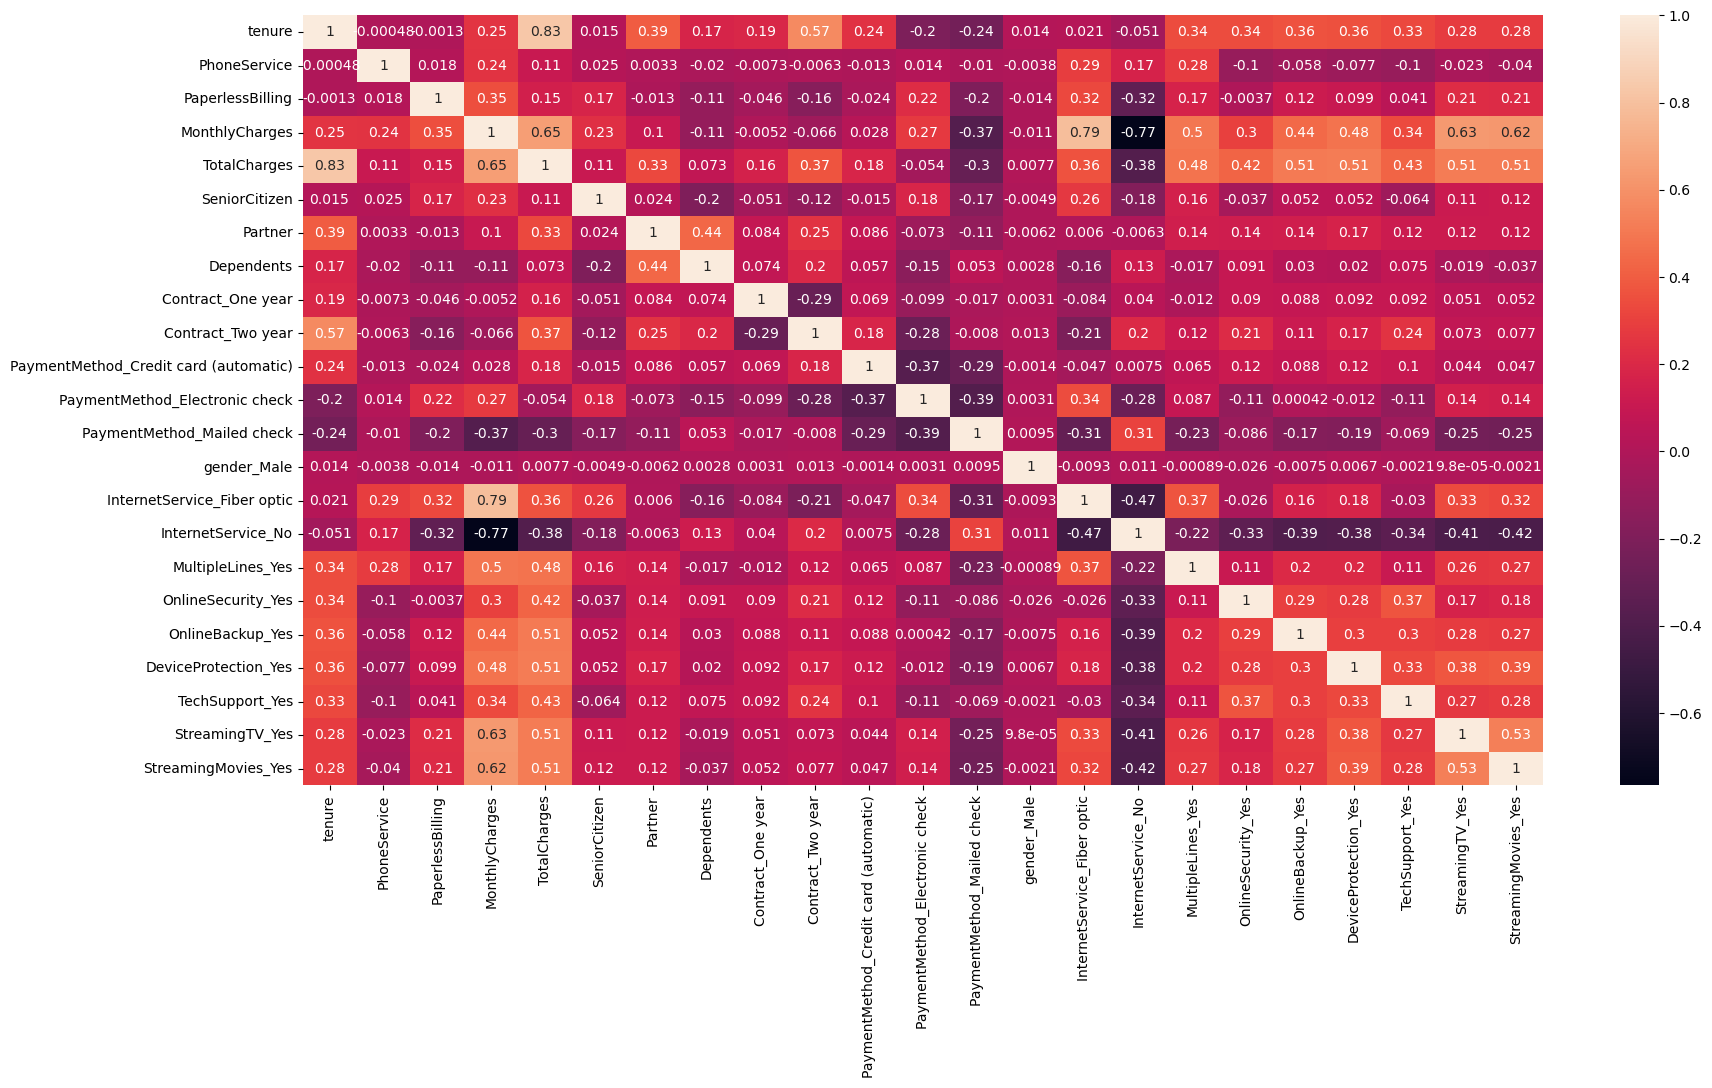

In [69]:
# After dropping the highly correalted variable checking the correlation again

plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

##### Step7 : Model Building

##### Running the first training model

In [72]:
import statsmodels.api as sm

In [73]:
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family= sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 02 Aug 2025   Deviance:                       4009.4
Time:                        20:13:00   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.0343      0.993      2.049      0.040       0.089       3.980
tenure                                   -0.0619      0.008     -8.015      0.000      -0.077      -0.047
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -0.0725      0.039     -1.880      0.060      -0.148       0.003
TotalCharges                              0.0003   8.73e-05      3.705      0.000       0.000       0.000
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

##### SIGNIFICANT VARIABLES (p < 0.05)
tenure, PaperlessBilling, TotalCharges, SeniorCitizen, Contract_One year, Contract_Two year, InternetService_Fiber optic, InternetService_No, MultipleLines_Yes,StreamingTV_Yes, StreamingMovies_Yes

##### NOT SIGNIFICANT VARIABLES (p ≥ 0.05)
PhoneService, MonthlyCharges, Partner, Dependents, PaymentMethod, gender_Male,OnlineSecurity_Yes, OnlineBackup_Yes, DeviceProtection_Yes, TechSupport_Yes

##### Step8: Feature Selection Using RFE (Recursive Feature Elimination)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logreg = LogisticRegression(max_iter=1000)

In [79]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= logreg, n_features_to_select= 15)

rfe= rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', False, 5),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', False, 9),
 ('SeniorCitizen', True, 1),
 ('Partner', True, 1),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 3),
 ('gender_Male', False, 6),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 4),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 2)]

In [82]:
X_train.columns[rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [83]:
X_train.columns[~rfe.support_]

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Mailed check', 'gender_Male', 'MultipleLines_Yes',
       'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [84]:
col = X_train.columns[rfe.support_]

##### Assessing the model with statsmodel

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2098.4
Date:                Sat, 02 Aug 2025   Deviance:                       4196.8
Time:                        20:13:01   Pearson chi2:                 4.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2566
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4866      0.152     -3.197      0.001      -0.785      -0.188
PhoneService                             -0.1861      0.149     -1.246      0.213      -0.479       0.107
PaperlessBilling                          0.2760      0.088      3.148      0.002       0.104       0.448
SeniorCitizen                             0.2819      0.097      2.899      0.004       0.091       0.472
Partner                                  -0.2339      0.088     -2.673      0.008      -0.405      -0.062
Dependents                               -0.1297      0.104     -1.242      0.214      -0.334       0.075
Contract_One year                        -1.2569      0.117    -10.752      0.000      -1.486      -1.028
Contract_Two year                        -2.2037      0.192    -11.484      0.000      -2.580      -1.828
PaymentMethod_Credit card (automatic)    -0.2629      0.118     -2.229      0.026      -0.494      -0.032
PaymentMethod_Electronic check            0.3218      0.089      3.622      0.000       0.148       0.496
InternetService_Fiber optic               0.7125      0.104      6.841      0.000       0.508       0.917
InternetService_No                       -1.1495      0.164     -7.027      0.000      -1.470      -0.829
OnlineSecurity_Yes                       -0.5325      0.099     -5.393      0.000      -0.726      -0.339
OnlineBackup_Yes                         -0.4042      0.086     -4.691      0.000      -0.573      -0.235
TechSupport_Yes                          -0.4265      0.099     -4.320      0.000      -0.620      -0.233
StreamingTV_Yes                           0.2246      0.086      2.615      0.009       0.056       0.393
=========================================================================================================
"""

##### Significant Predictors of Churn (p < 0.05)

##### Decrease churn (Negative Coefficients):
Partner, Contract_One year, Contract_Two year, PaymentMethod_Credit card, InternetService_No, OnlineSecurity_Yes, OnlineBackup_Yes,TechSupport_Yes

##### Increase churn (Positive Coefficients):
PaperlessBilling, SeniorCitizen, PaymentMethod_Electronic check, InternetService_Fiber optic, StreamingTV_Yes

##### Not Significant (p > 0.05):
PhoneService, Dependents

In [89]:
# Getting the predicted values on train sets

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.309835
5790    0.393647
6498    0.558082
880     0.377303
2784    0.496049
3874    0.481286
5387    0.356340
6623    0.714936
4465    0.284724
5364    0.513214
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30983493, 0.39364749, 0.55808173, 0.37730288, 0.49604923,
       0.48128609, 0.35634031, 0.71493594, 0.28472352, 0.5132136 ])

##### Creating a dataframe with actual Churn flag and predicted probabbilities

In [92]:
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.309835,879
1,0,0.393647,5790
2,1,0.558082,6498
3,1,0.377303,880
4,1,0.496049,2784


##### Creating a new coloumn 'predicted' with 1 if Chrun_Prob greater than 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)

In [95]:
#checking the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.309835,879,0
1,0,0.393647,5790,0
2,1,0.558082,6498,1
3,1,0.377303,880,0
4,1,0.496049,2784,0


In [96]:
from sklearn import metrics

In [97]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3233,  402],
       [ 628,  659]], dtype=int64)

In [98]:
# Predicted     not_churn    churn
# Actual
# not_churn        3233      402
# churn            628       659  

In [99]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7907354733848029


##### Checking VIFs


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
X_train[col]

,PhoneService,PaperlessBilling,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
879,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5790,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1
6498,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0
880,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1
2784,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0
3934,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
5964,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0
6947,1,1,0,1,1,1,0,1,0,1,0,0,1,0,1


In [103]:
# Creating a data frame that will contain the name of all the feature variables and their respective vifs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,Features,VIF
0,PhoneService,7.47
9,InternetService_Fiber optic,3.40
10,InternetService_No,2.97
1,PaperlessBilling,2.69
3,Partner,2.60
6,Contract_Two year,2.30
14,StreamingTV_Yes,2.22
13,TechSupport_Yes,2.04
8,PaymentMethod_Electronic check,2.00
12,OnlineBackup_Yes,2.00


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.



In [105]:
col = col.drop('PhoneService')
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [106]:
#Now re-running the model with selected variable
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2099.2
Date:                Sat, 02 Aug 2025   Deviance:                       4198.4
Time:                        20:13:01   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2564
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6191      0.110     -5.638      0.000      -0.834      -0.404
PaperlessBilling                          0.2785      0.088      3.178      0.001       0.107       0.450
SeniorCitizen                             0.2862      0.097      2.947      0.003       0.096       0.477
Partner                                  -0.2304      0.087     -2.635      0.008      -0.402      -0.059
Dependents                               -0.1320      0.104     -1.265      0.206      -0.337       0.073
Contract_One year                        -1.2591      0.117    -10.772      0.000      -1.488      -1.030
Contract_Two year                        -2.2040      0.192    -11.486      0.000      -2.580      -1.828
PaymentMethod_Credit card (automatic)    -0.2590      0.118     -2.198      0.028      -0.490      -0.028
PaymentMethod_Electronic check            0.3266      0.089      3.681      0.000       0.153       0.500
InternetService_Fiber optic               0.6496      0.091      7.177      0.000       0.472       0.827
InternetService_No                       -1.2054      0.157     -7.680      0.000      -1.513      -0.898
OnlineSecurity_Yes                       -0.5364      0.099     -5.436      0.000      -0.730      -0.343
OnlineBackup_Yes                         -0.4029      0.086     -4.675      0.000      -0.572      -0.234
TechSupport_Yes                          -0.4337      0.099     -4.402      0.000      -0.627      -0.241
StreamingTV_Yes                           0.2315      0.086      2.701      0.007       0.064       0.400
=========================================================================================================
"""

In [107]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [108]:
y_train_pred[:10]

array([0.32224546, 0.36637795, 0.55792924, 0.37617507, 0.49371311,
       0.49649322, 0.32603237, 0.71541885, 0.26083427, 0.51249517])

In [109]:
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x : 1 if x>.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.322245,879,0
1,0,0.366378,5790,0
2,1,0.557929,6498,1
3,1,0.376175,880,0
4,1,0.493713,2784,0


In [110]:
#lets check the overall accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7885006095083299


So overall accuracy havenot drop much

In [112]:
#Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,Features,VIF
2,Partner,2.59
8,InternetService_Fiber optic,2.52
0,PaperlessBilling,2.51
5,Contract_Two year,2.30
13,StreamingTV_Yes,2.21
11,OnlineBackup_Yes,1.97
12,TechSupport_Yes,1.96
7,PaymentMethod_Electronic check,1.90
3,Dependents,1.88
10,OnlineSecurity_Yes,1.81


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [114]:
#Let's look at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3237,  398],
       [ 643,  644]], dtype=int64)

In [115]:
# Actual/Predicted     not_churn    churn
        # not_churn        3237      398
        # churn            643       644  

In [116]:
#Lets check the accuracy score
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7885006095083299

The model correctly predicted the outcome for 78.85% of the training samples.

##### Relying only on accuracy can be misleading, especially with imbalanced datasets.

##### Metrics beyond simply accuracy

In [120]:
TP = confusion[1,1] #True Positive
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative

In [121]:
#Checking the sensitivity(Recall or True Positive Rate of our model)

TP/float(TP+FN)

0.5003885003885004

In [122]:
# Cheking the specifity or true negative rate

TN/float(TN+FP)

0.8905089408528198

In [123]:
#Calculation the false positive rate -predicting churn when customer does not have churned

FP/float(FP+TN)

0.10949105914718019

In [124]:
# positive predictive value 
TP/float(TP+FP)

0.6180422264875239

In [125]:
#Negative predictive value
TN/float(TN+FN)

0.834278350515464

##### Step9: Plotting the ROC curve

##### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score

In [129]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate= False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr , label = 'ROC curve(area = %0.2F)' % auc_score)
    plt.plot((0,1), (0,1), 'k--')
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.5)
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate= False)

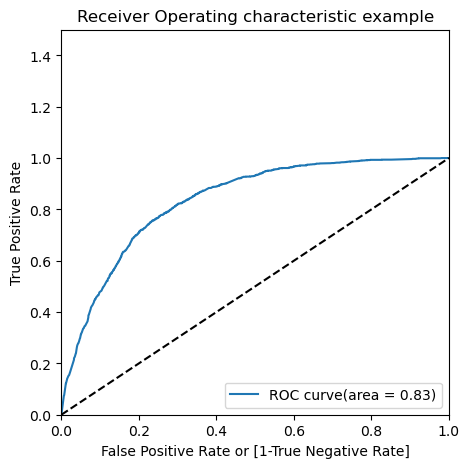

In [131]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

##### Step10: Finding the optimal cutoff point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [134]:
# Let's create columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.322245,879,0,1,1,1,1,0,0,0,0,0,0
1,0,0.366378,5790,0,1,1,1,1,0,0,0,0,0,0
2,1,0.557929,6498,1,1,1,1,1,1,1,0,0,0,0
3,1,0.376175,880,0,1,1,1,1,0,0,0,0,0,0
4,1,0.493713,2784,0,1,1,1,1,1,0,0,0,0,0


In [135]:
# Calculating accuracy, sensitivity and specificity for various probability cutoff
cutoff_df = pd.DataFrame(columns=['prob','accuracy', 'sensi', 'speci'])

from sklearn.metrics import confusion_matrix

#TP = confusion[1,1] #True Positive
#TN = confusion[0,0] #True Negative
#FP = confusion[0,1] #False Positive
#FN = confusion[1,0] #False Negative

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[1,1]+cm1[0,0])/total1
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.597725  0.949495  0.473177
0.2   0.2  0.706420  0.858586  0.652545
0.3   0.3  0.752133  0.778555  0.742779
0.4   0.4  0.781999  0.681430  0.817607
0.5   0.5  0.788501  0.500389  0.890509
0.6   0.6  0.781593  0.301476  0.951582
0.7   0.7  0.761276  0.118881  0.988721
0.8   0.8  0.738521  0.000000  1.000000
0.9   0.9  0.738521  0.000000  1.000000


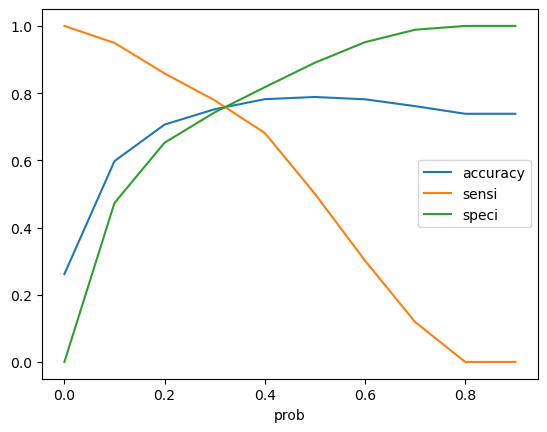

In [136]:
# Lets calculate accuracy, sensitivity, specifity for different probabilities

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()



##### From the curve it can be seen that .3 is optimal point to take it as probability

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.322245,879,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.366378,5790,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.557929,6498,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.376175,880,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.493713,2784,0,1,1,1,1,1,0,0,0,0,0,1


In [139]:
# Lets check the overall accuracy score

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7521332791548151

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
confusion2

array([[2700,  935],
       [ 285, 1002]], dtype=int64)

In [141]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [142]:
# Sensitivity
TP/float(TP+FN)

0.7785547785547785

In [143]:
#Specificity
TN/float(TN+FP)

0.7427785419532325

In [144]:
# False positive rate
FP/float(FP+TN)

0.25722145804676755

In [145]:
#Positive predicted value
TP/float(TP+FP)

0.5172947857511616

In [146]:
#Negative predicted value
TN/float(TN+FN)

0.9045226130653267

##### Precision and Recall

In [148]:
# Looking at the confusion matrix again

In [149]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3237,  398],
       [ 643,  644]], dtype=int64)

In [150]:
# Precision
# TP/TP+FP

In [151]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.6180422264875239

In [152]:
#Recall
#TP/TP+FN

In [153]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.5003885003885004

In [154]:
# Now will check precision score and recall score using sklearn

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6180422264875239

In [157]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5003885003885004

##### Precision and Recall trade off

In [159]:
from sklearn.metrics import precision_recall_curve

In [160]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

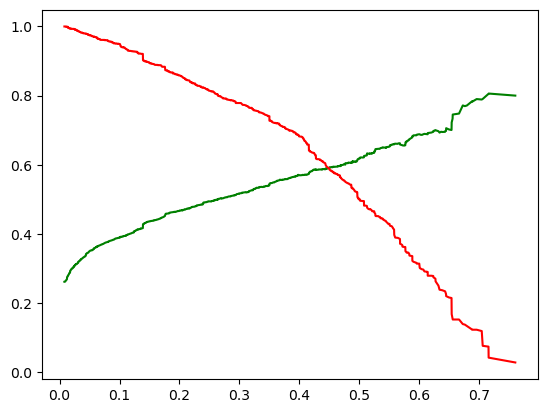

In [162]:
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds,r[:-1], 'r-')
plt.show()

- The intersection point is where the green (precision) and blue (recall) lines cross the value here is .42
- The intersection point (where precision = recall) is the threshold at which The proportion of true positives among predicted positives is equal to
the proportion of true positives among actual positives.

##### Step 11: Making predictions on the test set

In [165]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,24,1,1,79.85,2001.00,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3730,57,1,1,104.50,5921.35,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,1
1761,58,1,1,24.45,1513.60,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
2283,1,1,1,71.55,71.55,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,41,1,0,19.70,804.25,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [166]:
# Scaling the values of tenure, MonthlyCharges, TotalCharges
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [167]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.343137,1,1,0.500328,-0.124547,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3730,1.001414,1,1,1.319705,1.605062,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,1
1761,1.042158,1,1,-1.341192,-0.339582,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
2283,-1.280248,1,1,0.224433,-0.975797,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,0.349510,1,0,-1.499084,-0.652539,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [168]:
#Feature selection
X_test = X_test[col]
X_test.head()

,PaperlessBilling,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
942,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3730,1,0,1,0,0,0,1,0,1,0,0,1,0,1
1761,1,0,0,0,0,1,1,0,0,1,0,0,0,0
2283,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1872,0,0,1,1,0,1,0,0,0,1,0,0,0,0


In [169]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

942     0.512495
3730    0.412960
1761    0.017827
2283    0.576650
1872    0.012238
1970    0.654017
2532    0.296082
1616    0.016105
2485    0.653763
5914    0.164513
dtype: float64

In [173]:
# Converting y_test_pred to a dataframe which is a array
y_pred_df = pd.DataFrame(y_test_pred)

In [174]:
y_pred_df.head()

,0
942,0.512495
3730,0.412960
1761,0.017827
2283,0.576650
1872,0.012238


In [175]:
# Converting y test to data frame
y_test_df = pd.DataFrame(y_test)

In [176]:
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [177]:
# Adding CustID to dataframe as index
y_test_df['CustID'] = y_test_df.index

In [178]:
y_test_df.head()

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872


In [179]:
# Removing index from both the dataframe to append them side by side
y_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop=True, inplace =True)

In [180]:
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

In [181]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.512495
1,1,3730,0.412960
2,0,1761,0.017827
3,1,2283,0.576650
4,0,1872,0.012238


In [182]:
# Renaming the column 0 to Churn_Prob
y_pred_final = y_pred_final.rename(columns= {0: 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.512495
1,1,3730,0.412960
2,0,1761,0.017827
3,1,2283,0.576650
4,0,1872,0.012238


In [183]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID', 'Churn', 'Churn_Prob'], axis=1)
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.512495
1,3730,1,0.412960
2,1761,0,0.017827
3,2283,1,0.576650
4,1872,0,0.012238


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>.42 else 0)

In [185]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.512495,1
1,3730,1,0.412960,0
2,1761,0,0.017827,0
3,2283,1,0.576650,1
4,1872,0,0.012238,0


In [186]:
# Lets check the overall accuracy score
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7786729857819905

In [187]:
confusion2= metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
confusion2

array([[1270,  258],
       [ 209,  373]], dtype=int64)

In [188]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [189]:
#Sensitivity
# TP/TP+FN

In [190]:
TP/float(TP+FN)

0.6408934707903781

In [191]:
#Specificity
TN/float(TN+FP)

0.831151832460733

##### Conclusion:
In this project, we developed a predictive model to identify customers at risk of churning from a telecom service provider. By analyzing 21 customer attributes—ranging from demographic information to account details and service usage—we built and evaluated several classification models, with logm3 performing the best (e.g., accuracy = 78%, AUC = 0.84). Key churn indicators included short tenure, high monthly charges, and being on month-to-month contracts without value-added services like online security or tech support. These insights can help telecom companies proactively target high-risk customers through personalized retention strategies. While the model performs well, it could be further enhanced with more behavioral or satisfaction data. Future improvements could involve integrating real-time analytics and testing more advanced ensemble or deep learning methods for even better churn prediction.